https://github.com/MilesLe/Design_Team

In [96]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir
from os.path import isfile, join

Extract Data
- Add new data files here to be processed in the pipeline. 

Filename
- Trial number 
- User 
- date: day, month, year
- Setup env
- Type of material (ex. Suture pad, Diaphragm)
- ex. 1_kathy_09102022_AnchorFailureBlackAcryllic_SuturePad.log

In [142]:
file_path = "./data/Suture_Pullout_Force_Measurements_(Suture Pad_Acrylic_w_circle)/"
data_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#print(data_files)

In [107]:
# Data extraction functions
''' 
Purpose: Extract all the data from the data files and organize them and meta data in a data structure.
Input: the data files with their category.
Return: main data structure.
'''
def extract_from_files(data_files):
    data = {}
    # iterate through each file provided
    for f in data_files:
        filename = f
        # meta data
        parsed_filename = f.split('_')
        trial= parsed_filename[0]
        user = parsed_filename[1]
        date = datetime.strptime(parsed_filename[2][:8], "%d%m%Y")
        setup_env = parsed_filename[3]
        material = parsed_filename[4][:-4]
        # raw data
        file_data = []
        for file in data_files:
            d = open(file_path + f, "r").read()
            d_arr = d.split("\n")
            d_arr_ = d_arr[6:len(d_arr)-1]
            for instance in d_arr_:
                instance_arr = instance.split("\t")
                file_data.append(instance_arr)
        raw_df = pd.DataFrame(file_data, columns =["Reading", "Load", "Travel", "Time" ]).drop(["Reading", "Travel"], axis=1)
        # add to main data struct.
        data[f] = {"trail": trial,
                   "user": user,
                   "date": date,
                   "setup_env": setup_env,
                   "material": material,
                   "data": raw_df}
            
    return data 


In [108]:
# Raw data extraction from raw file. Apply data extraction functions
all_data = extract_from_files(data_files)
print(all_data)

{'15_emma_13112022_AnchorFailureBlackAcrylic_SuturePad.log': {'trail': '15', 'user': 'emma', 'date': datetime.datetime(2022, 11, 13, 0, 0), 'setup_env': 'AnchorFailureBlackAcrylic', 'material': 'SuturePad', 'data':        Load   Time
0     -0.34  0.000
1     -0.34  0.048
2      0.34  0.214
3      0.34  0.248
4      0.34  0.298
...     ...    ...
6199   0.00  6.448
6200   0.00  6.498
6201   0.00  6.548
6202   0.00  6.598
6203   0.00  6.648

[6204 rows x 2 columns]}, '18_kathy_06112022_AnchorFailureBlackAcrylic_SuturePad.log': {'trail': '18', 'user': 'kathy', 'date': datetime.datetime(2022, 11, 6, 0, 0), 'setup_env': 'AnchorFailureBlackAcrylic', 'material': 'SuturePad', 'data':        Load   Time
0     -1.98  0.000
1     -1.96  0.051
2     -1.98  0.099
3     -0.70  0.292
4     -0.70  0.299
...     ...    ...
6951   0.02  7.249
6952   0.02  7.298
6953   0.00  7.348
6954   0.02  7.398
6955   0.02  7.449

[6956 rows x 2 columns]}, '15_kathy_06112022_AnchorFailureBlackAcrylic_SuturePad.log':

Data Cleaning

In [48]:
# Cleaning and data engineering functions


'''
Purpose: 
Parameters: 
Return: 
'''

# NONE FOR NOW YEEEEE


'\nPurpose: \nParameters: \nReturn: \n'

In [49]:
# Apply each cleaning function to each dataframe.

# NONE FOR NOW YEEEEE

Data Analysis


{'1_kathy_11062022_AnchorFailureBlackAcryllic_SuturePad.log': 
    {'trail': '1', 
     'user': 'kathy', 
     'date': datetime.datetime(2022, 6, 11, 0, 0), 
     'setup_env': 'AnchorFailureBlackAcryllic', 
     'material': 'SuturePad', 
     'data':       Load    Time
            0    -0.50   0.000
            1     1.04   0.247
            2     1.04   0.300
            3    -0.48   0.350
            4    -0.42   0.400
            ..     ...     ...
            883   0.00  14.750
            884   0.00  14.800
            885   0.00  14.850
            886   0.00  14.900
            887   0.00  14.951

In [140]:
# Analysis functions

'''
Purpose: Scatter plot of breakaway data and show somes stats
Parameters:
- all_data (main data structure)
- measurements (list): ["Load (N), Time (sec)"]
Return: None
'''


def plot_breakaway(all_data):
    
    setup_envs = []
    materials = []
    users = []
    for filename in all_data:
        data = all_data[filename]
        if data["setup_env"] not in setup_envs:
            setup_envs.append(data["setup_env"])
        if data["material"] not in materials:
            materials.append(data["material"])
        if data["user"] not in users:
            users.append(data["user"])
        
    user_col = []
    max_force_col = []
    for user in users:
        # Get specific file to analyze
        for filename in all_data:
            data = all_data[filename]
            if (data["user"] == user):
                df = data['data']
                df['Load'] = df['Load'].astype(float)
                y = df['Load'].values
                user_col.append(user)
                max_force_col.append(max(y))

    d = {'user': user_col, 'max_force': max_force_col}
    my_df = pd.DataFrame(data=d)
    #display(my_df)
    
    sns.set_style("whitegrid")
    sns.set(rc={'figure.figsize':(15,10)})
    p = sns.stripplot(x="user", y="max_force", data=my_df, size=7, color=".7")
    plt.xticks(rotation=45, ha="right")
    #p.set(yscale='log')
    # plot the mean line
    ax = sns.boxplot(showmeans=True,
                meanline=True,
                meanprops={'color': 'k', 'ls': '-', 'lw': 2},
                medianprops={'visible': False},
                whiskerprops={'visible': False},
                zorder=10,
                x="user",
                y="max_force",
                data=my_df,
                showfliers=False,
                showbox=True,
                showcaps=True,
                ax=p)
    ax.set(ylim=(0, 20))
    plt.show()
    


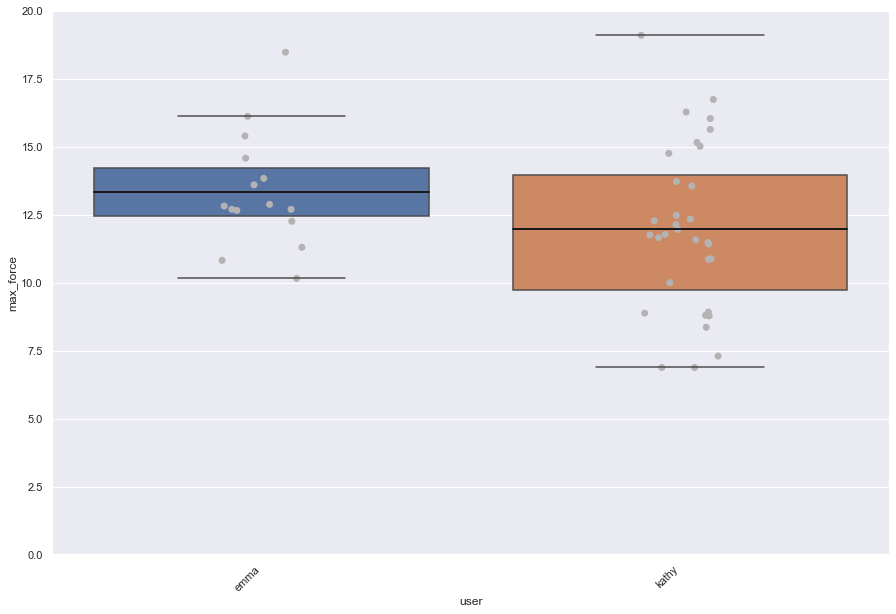

In [141]:
# Apply analysis functions
plot_breakaway(all_data)
